# 1. Beginner Tutorials - 3. Text and Sequence - 1. Word Embedding

### 목차
1. Representing text as numbers
 - One-hot encodings
 - Encode each word with a unique number
 - Word embeddings
2. Using the Embedding layer
3. Learning embeddings from scratch
 - Convert the integers back to words
 - Create a simple model
 - Compile and train the model
4. Retrieve the learned embeddings
5. Visualize the embeddings

Embedding projector : http://projector.tensorflow.org/

embed 1. (단단히) 박다   2. (종군 기자·사진 기자 등을) 파견하다<br>
embedding 어떤 위상(位相) 공간에서 다른 위상 공간으로의 동상 사상(同相寫像).<br>

# 1. Representing text as numbers

Machine learning models take vectors (arrays of numbers) as input.<br>
When working with text, the first thing ... strategy to __convert strings to numbers__<br>

## 1-1 One-hot encodings
### First Approach
|--|cat|mat|on|sat|the|
|--|--|--|--|--|--|
|the|0|0|0|0|1|
|cat|1|0|0|0|0|
|sat|0|0|0|1|0|

A one-hot encoded vector is sparse.<br>
we would create a vector where 99.99% of the elements are zero<br>

## 1-2 Encode each word with a unique number
### Second Approach

...encode each word using a unique number.<br>
...assign 1 to "cat", 2 to "mat", <br>
This appoach is efficient.  ... have a dense one (where all elements are full).<br>

### two downsides 
- The integer-encoding is arbitrary (it does not capture any relationship between words).
- An integer-encoding can be challenging for a model to interpret. 

## 1-3 Word embeddings
### Third Approach (Best)

...an efficient, dense representation...we do not have to specify this encoding by hand.<br>
An embedding is a dense vector of floating point values ...trainable parameters <br>
...8-dimensional (for small datasets), up to 1024-dimensions (for large datasets)<br>
A higher dimensional embedding can capture fine-grained relationships between words, <br>
but takes more data to learn.<br>

|--|--|--|--|--|
|--|--|--|--|--|
|the|1.2|-0.1|4.3|3.2|
|cat|1.2|0.2|-0.9|-0.5|
|sat|2.1|0.3|0.1|1.2|

 Each word is represented as a 4-dimensional vector of floating point values.

# 2. Using the Embedding layer

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# max 999 vocabulary, 32 dim
embedding_layer = layers.Embedding(1000,32)
"""
Embedding
input_dim:int > 0. Size of the vocabulary, i.e. maximum integer index + 1.
output_dim: int >= 0. Dimension of the dense embedding.
__init__(
    input_dim,
    output_dim,
    embeddings_initializer='uniform',
    embeddings_regularizer=None,
    activity_regularizer=None,
    embeddings_constraint=None,
    mask_zero=False,
    input_length=None,
    **kwargs
)
"""

"\nEmbedding\ninput_dim:int > 0. Size of the vocabulary, i.e. maximum integer index + 1.\noutput_dim: int >= 0. Dimension of the dense embedding.\n__init__(\n    input_dim,\n    output_dim,\n    embeddings_initializer='uniform',\n    embeddings_regularizer=None,\n    activity_regularizer=None,\n    embeddings_constraint=None,\n    mask_zero=False,\n    input_length=None,\n    **kwargs\n)\n"

In [3]:
embedding_layer

When you create an Embedding layer, the weights for the embedding are randomly initialized (just like any other layer). During training, they are gradually adjusted via backpropagation.

# 3. Learning embeddings from scratch

IMDB movie reviews.

In [4]:
vocab_size = 10000
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size)

In [5]:
print(train_data.shape)

(25000,)


In [6]:
print(len(train_data[0]))
print(train_data[0])

218
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [7]:
a = []
for i in range(10):
    a.append(len(train_data[i]))
print(a)

[218, 189, 141, 550, 147, 43, 123, 562, 233, 130]


## 3-1 Convert the integers back to words

In [8]:
word_index = imdb.get_word_index()

In [9]:
print(len(word_index))

88584


In [10]:
import itertools as it
for i in it.islice(word_index,5):
    print(i, word_index[i])

fawn 34701
tsukino 52006
nunnery 52007
sonja 16816
vani 63951


In [11]:
list(word_index.items())[:10]

[('fawn', 34701),
 ('tsukino', 52006),
 ('nunnery', 52007),
 ('sonja', 16816),
 ('vani', 63951),
 ('woods', 1408),
 ('spiders', 16115),
 ('hanging', 2345),
 ('woody', 2289),
 ('trawling', 52008)]

In [12]:
word_index = {k:(v+3) for k,v in word_index.items()}
word_index['<PAD>'] = 0
word_index['<START>'] = 1
word_index['<UNK>'] = 2 #unknown
word_index['<UNUSED>'] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i,'?') for i in text])

# get(x, 'default')

In [13]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

Movie reviews can be different lengths. <br>
We will use the __pad_sequences function to standardize the lengths of the reviews.__<br>

In [14]:
maxlen = 500

train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=maxlen)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=maxlen)

In [15]:
print(len(train_data[0]))

500


## 3-2 Create a simple model

- The first layer is an Embedding layer. The resulting dimensions are: (batch, sequence, embedding)`.
- Next, a GlobalAveragePooling1D layer returns a fixed-length output vector for each example by averaging over the sequence dimension.
- This fixed-length output vector is piped through a fully-connected (Dense) layer with 16 hidden units.
- The last layer is densely connected with a single output node. Using the sigmoid activation function

In [16]:
embedding_dim = 16

model = keras.Sequential([
    layers.Embedding(vocab_size, embedding_dim, input_length=maxlen), # 10000, 16, 500
    layers.GlobalAveragePooling1D(),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


## 3-3 Compile and train the model

In [17]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(
    train_data,
    train_labels,
    epochs=30,
    batch_size=512,
    validation_data=(test_data, test_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/30
25000/25000 [==============================] - 2s 87us/sample - loss: 0.6921 - accuracy: 0.5666 - val_loss: 0.6905 - val_accuracy: 0.6095
Epoch 2/30
25000/25000 [==============================] - 1s 59us/sample - loss: 0.6863 - accuracy: 0.6563 - val_loss: 0.6810 - val_accuracy: 0.6873
Epoch 3/30
25000/25000 [==============================] - 2s 62us/sample - loss: 0.6693 - accuracy: 0.7467 - val_loss: 0.6576 - val_accuracy: 0.7588
Epoch 4/30
25000/25000 [==============================] - 2s 60us/sample - loss: 0.6352 - accuracy: 0.7784 - val_loss: 0.6184 - val_accuracy: 0.7713
Epoch 5/30
25000/25000 [==============================] - 2s 61us/sample - loss: 0.5847 - accuracy: 0.8000 - val_loss: 0.5660 - val_accuracy: 0.8008
Epoch 6/30
25000/25000 [==============================] - 2s 68us/sample - loss: 0.5245 - accuracy: 0.8268 - val_loss: 0.5112 - val_accuracy: 0.8210
Epoch 7/30
25000/25000 [==============================] 

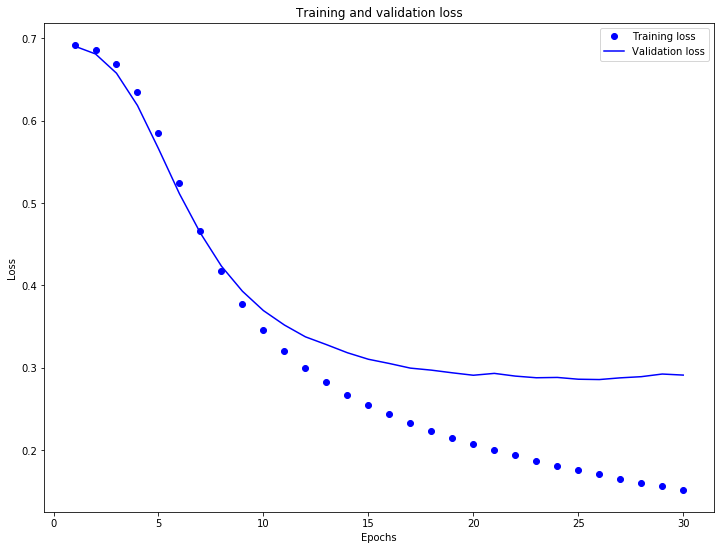

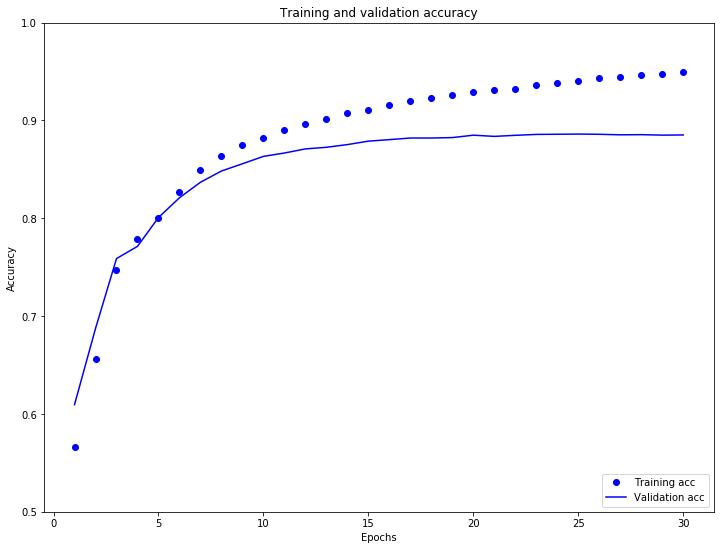

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(12,9))
plt.plot(epochs, loss,' bo', label='Training loss')
plt.plot(epochs, val_loss,'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

# 4. Retrieve the learned embeddings

- retrieve : 1. (특히 제자리가 아닌 곳에 있는 것을) 되찾아오다   2. (정보를) 검색하다

This will be a matrix of shape (vocab_size,embedding-dimension).

In [19]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)


To use the Embedding Projector, we will upload two files in tab separated format: a file of vectors (containing the embedding), and a file of meta data (containing the words).

In [20]:
import io
out_v = io.open('vecs.tsv','w', encoding='utf-8')
out_m = io.open('meta.tsv','w', encoding='utf-8')
for word_num in range(vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + '\n')
    out_v.write('\t'.join([str(x) for x in embeddings]) + '\n')
    
out_v.close()
out_m.close()

# 5. Visualize the embeddings

Open the Embedding Projector.: http://projector.tensorflow.org/

- Click on "Load data".
- Upload the two files we created above: vecs.tsv and meta.tsv. T